# Milestone 2 - Phase 2
## 1.Perkenalan
`Fachmi Maris`

Batch 002

### Sumber :
https://www.kaggle.com/datasets/gpiosenka/beauty-detection-data-set/code

### Topik 
Imagge classification

### Konteks

Kumpulan data ini dibuat untuk menentukan apakah CNN dapat dilatih untuk mengklasifikasikan gambar wajah wanita ke dalam salah satu dari dua kelas, Cantik atau Sedang. Saya ingin tahu bagaimana kita tampaknya memiliki sistem pengenalan pola bawaan di otak kita yang membedakan orang dengan morfologi wajah mereka. Morfologi adalah ilmu yang mempelajari bentuk dan ukuran. Sedangkan morfologi wajah dimaksudkan ilmu yang mempelajari tentang bentuk, ukuran dan proporsi wajah serta bagian bagian wajah. Saya mencoba apakah CNN dapat dilatih untuk membuat klasifikasi wajah berdasarkan foto. Pada penelitian ini, menggunakan dataset yang terdiri dari 2000 foto model fesyen dari seluruh dunia untuk digunakan sebagai gambar data `beautiful`, kemudian dataset terdiri dari 2000 foto dari kumpulan data celeb. Dari kumpulan gambar yang ada, dataset yang tersedia adalah wanita yang berada dalam rentang usia yang sama dengan model fesyen tetap menurut saya berpenampilan `Average`. Tentu saja ini adalah penafsiran atau opini si pembuat dataset tentang `Average` yang mungkin akan berbeda menurut penilaian orang lain mengenai `Average` sehingga wajar apabila ada bias alami dalam seleksi. Pembuat dataset sudah menyiapkan set untuk validasi dan set untuk test.

### Content
Dataset terdiri dari satu set training, satu set tes, satu set validasi. Masing-masing set ini berisi dua folder berlabel `Beautiful` dan `Average`. Data training ada 2000 gambar di folder `Beautiful` dan 2000 gambar di folder `Average`. Untuk set test ada 150 gambar di folder `Beautiful` dan 150 gambar di folder `Average`. Set validasi juga dibagi menjadi 150 gambar dari setiap jenis. Semua gambar adalah gambar foto dengan format .jpg berwarna 224 X 224 X 3. Gambar telah dipotong untuk hanya menampilkan wajah. Semua set data dijalankan melalui pendeteksi gambar duplikat dan semua gambar duplikat dihapus untuk mencegah kebocoran di antara set data



## 2.Import Library

In [1]:
#For Data Manipulation
import numpy as np
import pandas as pd

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
%matplotlib inline

# For Modeling Artificial Neural Network
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras import layers
from tensorflow.keras import layers
from keras.utils import plot_model
from  tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img, array_to_img

from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Dropout, Conv2D, AveragePooling2D, Flatten
import os
import glob
import cv2
import random
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import time
from datetime import timedelta

#Saving Model
import pickle

sns.set_style("white")
np.random.seed(14)
tf.random.set_seed(14)

import warnings
warnings.filterwarnings(action="ignore")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## 3.Data Loading

In [2]:
train_dir = r'train/'
val_dir = r'valid'
test_dir = r'test/'

Code di atas untuk membuat variabel yang memanggil folder di data lokal, setiap folder di dalamnya sudah memiliki dua folder yang terbagi menjadi folder `Beautiful` dan folder `Average`

In [3]:
print('CPU: {}'.format(len(tf.config.list_physical_devices('CPU'))))
print('GPU: {}'.format(len(tf.config.list_physical_devices('GPU'))))

CPU: 1
GPU: 0


Terdapat CPU dan tidak ditemukan GPU pada komputer yang digunakan dalam penelitian ini.

In [4]:
IMG_SIZE = (200,200)
BATCH_SIZE = 32

Membuat variabel IMG_SIZE yang berisi ukuran 200pixle x 200pixle
Variabel Batch_Size sebanyak 32
batch size yang mewakili jumlah elemen berurutan dari kumpulan data ini untuk digabungkan dalam satu batch.

Jika Anda melatih model untuk 10 epoch dengan ukuran batch_size 32, diberikan total 4000 sampel berarti: model anda akan dapat melihat seluruh dataset dalam 125 iterasi (4000 / 32 = 125) setiap satu epoch. Secara keseluruhan, model akan memiliki 125 X 10 = 1250 iterasi (iterasi-per-Epoch X num-of-Epochs).

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            label_mode='categorical')

Found 4000 files belonging to 2 classes.


train_dataset berisi 4000 data gambar yang terbagi ke dalam 2 kelas.

In [6]:
val_dataset = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                          shuffle=True,
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE,
                                                          label_mode='categorical')

Found 300 files belonging to 2 classes.


val_dataset berisi 300 data gambar yang terbagi ke dalam 2 kelas.

In [7]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                          shuffle=True,
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE,
                                                          label_mode='categorical')

Found 300 files belonging to 2 classes.


test_dataset berisi 300 data gambar yang terbagi ke dalam 2 kelas.

In [8]:
class_names = train_dataset.class_names
print(class_names)

['average', 'beautiful']


Dalam train_dataset terbagi menjadi 2 kelas yaitu kelas `average` dan kelas `beautiful`

In [9]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32, 2)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(2000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

tf.data membuat model performa pipeline dan menjalankan algoritma pengoptimalan untuk menemukan alokasi budget CPU yang baik di semua parameter yang ditentukan sebagai AUTOTUNE. Saat pipeline input sedang berjalan, tf.data melacak waktu yang dihabiskan di setiap operasi, sehingga waktu ini dapat dimasukkan ke dalam algoritme pengoptimalan. 

Cache() digunakan untuk membaca data dari epoch pertama, dan di semua epoch berikutnya hanya membaca data dari memori. dapat meng-cache set data, baik di memori atau di penyimpanan lokal. Ini akan menghemat beberapa operasi (seperti pembukaan file dan pembacaan data) agar tidak dieksekusi selama setiap epoch.

Sebagian besar pipeline input set data harus diakhiri dengan panggilan untuk prefetch.prefecth () Ini memungkinkan elemen selanjutnya disiapkan saat elemen saat ini sedang diproses. Hal ini sering kali meningkatkan latensi dan throughput, dengan mengorbankan penggunaan memori tambahan untuk menyimpan elemen yang diambil sebelumnya

shuffle = data didalam folder tersebut diacak sehingga tidak sesuai urutan yang ada seperti urutan alfabetik

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96423537


## 4.Exploratory Data Analysis (EDA)

In [13]:
data_dir =  pathlib.Path(train_dir)
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4000


Data Train terdiri dari 4000 gambar foto

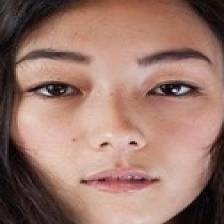

In [14]:
beauty = list(data_dir.glob('beautiful/*'))
PIL.Image.open(str(beauty[564]))

Foto di atas adalah contoh foto yang termasuk foto ke dalam kategori `beautiful`

In [15]:
len(list(beauty))

2000

Data train dengan kelas beautiful terdiri dari 2000 gambar

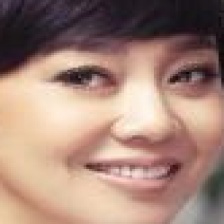

In [16]:
average = list(data_dir.glob('average/*'))
PIL.Image.open(str(average[374]))

Foto di atas adalah contoh foto yang termasuk ke dalam kelas `Average`

In [17]:
len(list(average))

2000

Data train dengan kelas average terdiri dari 2000 gambar

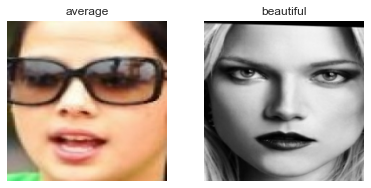

In [54]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[list(labels[i]).index(1)])
    plt.axis("off")

kedua foto di atas adalah contoh komparasi antara kelas `average` dengan kelas `beautiful`

## 5.Data Prepocessing

### Standarisasi Data

In [19]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

Melakukan rescaling untuk mempermudah proses komputasi. Foto yang dibaca komputer adalah rangkaian dari sistem kordinat citra digital yang diwakilkan oleh angka paling kecil adalah 1 paling besar adalah 255 dengan demikian range yang ada adalah 1-255. Rescaling menyederhanakannya dengan mengubah range 0-1 sebagai resepentasi 1-255.

### Data Augmentation dan Model Input

In [20]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal', seed=0),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3, seed = 0)])

Data Augmentation adalah sebuah teknik memanipulasi sebuah data tanpa kehilangan inti atau esensi dari data tersebut. Untuk data berupa Image, kita bisa lakukan rotate, flip, crop, dll. Pada penelitian ini data augmentasi yang dilakukan selain melakuan rescaling, augmentasi dilakukan dengan melakukan flip dan rotasi pada foto. Data augmentasi hanya maasuk proses pemodelan pada saat training saja. Tidak masuk saat proses validasi dan testing.

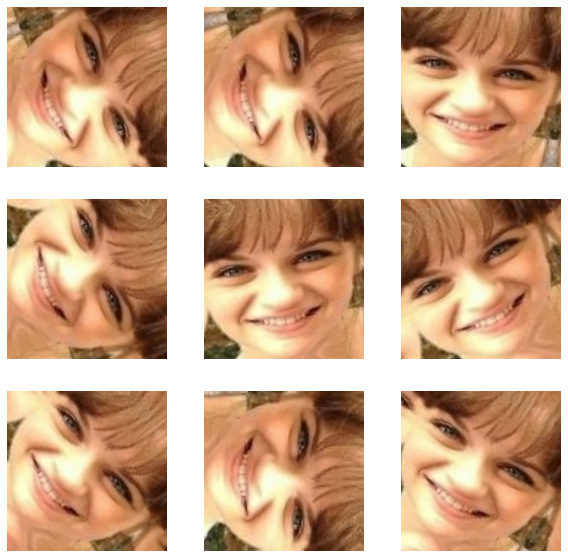

In [21]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

9 foto di atas adalah hasil augmentasi dari salah satu foto sebagai sampel. Dengan adanya augmentasi saat model diberikan foto wajah dengan kondisi tidak tegak lurus maka model akan tetap mampu mendeteksinya.

## 6.Model Definition

In [22]:
model = Sequential([
    normalization_layer,
    layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(200,200,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(200,200,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    #layers.Dropout(0.2),
    layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',input_shape=(200,200,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    #layers.Dropout(0.2),
    layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',input_shape=(200,200,3), activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    #layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(2, activation=  'softmax')
])


- Sequential adalah Pencarian berurutan sering disebut pencarian linear merupakan
metode pencarian yang paling sederhana. Pencarian berurutan menggunakan
prinsip sebagai berikut: data yang ada dibandingkan satu persatu secara berurutan
dengan yang dicari sampai data tersebut ditemukan atau tidak ditemukan
- Sublibrary Convolution2D digunakan untuk memulai CNN di tahap pertama yaitu proses convolution. Karena kita mengolah data berupa gambar maka kita gunakan library convolution khusus untuk 2 dimensi yaitu Convolution2D.
- Sublibrary MaxPooling2D digunakan setelah proses convolution, yaitu dengan mengambil nilai maximumnya (disebut dengan maxpooling). Karena kita mengolah gambar, maka kita gunakan maxpooling untuk 2 dimensi
- Sublibrary Flatten digunakan untuk proses flattening yang dilakukan setelah proses maxpooling. Tahapan flattening adalah merubah dari matriks yang ada di pooling layer menjadi satu kolom saja (sebuah vektor tunggal). Nantinya vektor ini akan menjadi bagian dari input layer di artificial neural networks (ANN)
- Sublibrary Dense digunakan untuk mendefinisikan parameter neural networks kita. Dense adalah fungsi untuk menambahkan layer yang fully connected
- parameter filter=32. Artinya kita akan menggunakan 32 feature detectors yang berukuran 3×3 (kernel_size=(3,3))
-  isi input_shape = (200, 200, 3). Artinya kita ingin semua ukuran gambar yang masuk ke dalam input layer berukuran 200×200 pixels, dan berukuran 3 array atau RGB
- activation = relu karena relu merupakan fungsi umum yang sering digunakan dikalangan data science dan merupakan rectifier function
- activation = softmax, Softmax Classifier adalah sebuah fungsi aktivasi yang di gunakan untuk
permasalahan klasifikasi, biasanya fungsi aktivasi ini digunakan pada output layer.
Pada dasarnya fungsi ini adalah probabilitas eksponential yang dinormalisasi dari
pengamatan kelas yang di wakili sebagai aktivasi neuron. Fungsi eksponensial akan
meningkatkan probabilitas nilai maksimum lapisan sebelumnnya dibandingkan
dengan nilai lainnya. pemilihan softmax dilakukan karena sebelumnya menggunakan sigmoid namun saat menggunakan sigmoid terkendala saat menetulam classificatin reoport
- Padding dapat dibedakan menjadi same atau valid padding. Same padding akan menambahkan value di sekitar border input agar nilai output berdimensi sama dengan input. Valid padding tidak akan menambahkan value, sehingga dimensi output berbeda dengan input.


In [23]:
model.build(input_shape=(None,200,200,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)      

angka 36864 pada flatten layer merupakan hasil perkalian dari dimensi sebelumnya yaitu (12x12x256=36864)

dense layer 128 merupakan angka yang menunjukan banyaknya neuron yang digunakan.

Total params diperoleh dari (36864 x 128) +128 =5.107.394 

In [24]:
model.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=['accuracy'])

- optimizer = parameter yang menentukan nilai bobot yang tepat untuk setiap jalur sinaps neuronnya. Kita pilih menggunakan metode stochastic gradient descent (SGD). Ada beberapa jenis SGD yang bisa dipilih yang digunakan adalah adam karena adam adalah optimizer terpopuler

- loss function yang harus kita tentukan yaitu perhitungan nilai error (seberapa jauh y model dari y real) parameter yang digunakan categoricalcrossentropy

- metrics = kriteria yang akan kita gunakan untuk mengevaluasi performanya. Performa akan ditinjau dari tingkat accuracynya.

## 7.Model Training

In [25]:
epochs=10

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs)

Epoch 1/10
125/125 [==============================] - 151s 1s/step - loss: 0.6119 - accuracy: 0.6765 - val_loss: 0.4857 - val_accuracy: 0.7833
Epoch 2/10
125/125 [==============================] - 142s 1s/step - loss: 0.3741 - accuracy: 0.8400 - val_loss: 0.3635 - val_accuracy: 0.8467
Epoch 3/10
125/125 [==============================] - 142s 1s/step - loss: 0.2857 - accuracy: 0.8848 - val_loss: 0.2610 - val_accuracy: 0.9033
Epoch 4/10
125/125 [==============================] - 138s 1s/step - loss: 0.2322 - accuracy: 0.9062 - val_loss: 0.3541 - val_accuracy: 0.8633
Epoch 5/10
125/125 [==============================] - 140s 1s/step - loss: 0.1790 - accuracy: 0.9337 - val_loss: 0.1611 - val_accuracy: 0.9433
Epoch 6/10
125/125 [==============================] - 138s 1s/step - loss: 0.1397 - accuracy: 0.9510 - val_loss: 0.1112 - val_accuracy: 0.9633
Epoch 7/10
125/125 [==============================] - 139s 1s/step - loss: 0.1220 - accuracy: 0.9542 - val_loss: 0.1013 - val_accuracy: 0.9600

Epoch berarti berapa kali jaringan akan melihat seluruh kumpulan data, pada model training akan melakukan training pada data train dan validation untuk mengetahui nilai loss dan accuracy pada data train dan validation

In [26]:
keras.backend.clear_session()

## 8.Model Evaluation

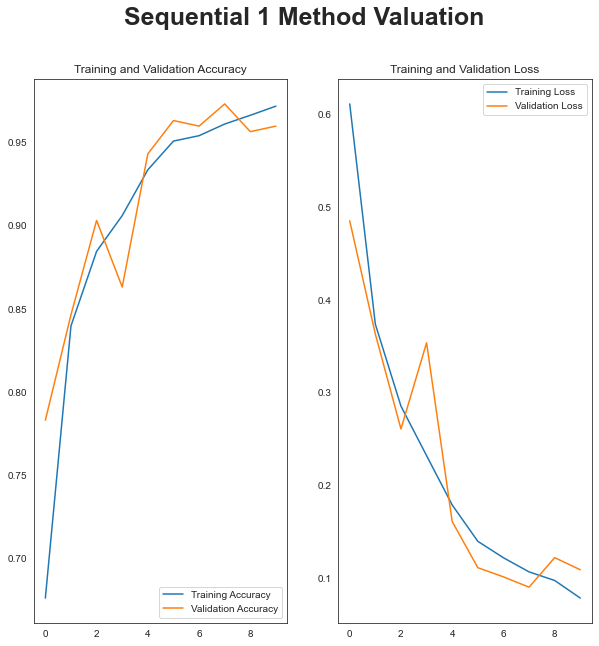

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.suptitle( 'Sequential 1 Method Valuation', fontsize=25, weight='bold')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Gambar di atas merupakan hasil dari pelatihan data train dan data validasi menggunakan epochs 10 kali. Berdasarkan gambar di atas dapat diketahui bahwa epochs menghasilkan nilai accuracy dan nilai loss untuk data train dan data validasi. 
- Nilai accuracy adalah nilai yang dijadikan nilai sebagai tolok ukur tingkat keberhasilan model yang telah dibuat.
- Nilai loss adalah nilai untuk meninjau ukuran sebuah error yang dibuat oleh network dan tujuannya adalah untuk meminamilisirnya.

> Berdasarkan gambar grafik di atas diketahui bahwa pada bagian accuracy saat epochs sudah mencapi 10 kali maka gradient terlihat semakin convergen karena jarak kedua gradient tidak terlalu jauh dan pada bagian loss saat epochs 10 kali maka gradient semakin convergen bahkan terlihat leboh smooth. Model dapat dinyatakan `Good Fit` karena jarak gradient tidak terlalu jauh

In [28]:
print("\nEvaluate on test data")
result = model.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
10/10 [==============================] - 3s 206ms/step - loss: 0.0520 - accuracy: 0.9833
Test - Loss     :  0.05196942761540413
Test - Accuracy :  0.9833333492279053



code di atas digunakan untuk melihat gambaran performa model saat baseline model melakukan proses testing pada test dataset. 
skor Loss pada Testing hanya 0.0519 atau dibulatkan menjadi 0.52 dan skor Accuracy untung testing mencapai 0.983. Skor ini sangat bagus menerutu peneliti karena skor Loss yang dihasilkan mendekati skor 0 dan skor accuracy hampir mencapai skor 1.


In [29]:
keras.backend.clear_session()

Clear_session digunakan untuk menghindari kekacauan dari model terutama saat memori terbatas.

Langkah - langkah di atas adalah proses pemodelan dengan parameter baseline untuk baseline model, hasilnya cukup memuaskan karena accuracynya 0.98 mendekati nilai 1 namun peneliti mencoba melakukan improvisasi untuk mengetahui apakah baseline model adalah model dengan parameter terbaik atau ada yang lebih baik lagi melalui proses improvisasi. Proses improvisasi dilakukan dengan menggunakan transfer learning ResNet50.

### Model Improvement

In [30]:

checkpoint = ModelCheckpoint('BeautyDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)


earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )


reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

- Callback checkpoint digunakan menghentikan epochs saat menemukan skor terbaik, di sini metriks yang di atur adalah nilai val_loss.
- Callback earlystop digunakan untuk menghentikan proses training jika skor val_loss paling rendah menunggu 3 epochs selanjutnya untuk berhenti jika tidak ada improvisasi pada proses training
- Callback reduce digunakan untuk mengurangi nilai learning rate ketika model tidak mengalami improvisasi selama 3 epochs berturut-turut.

Tansfer Learning 

In [31]:
ResNet50=tf.keras.applications.ResNet50(input_shape=(200,200,3),include_top=False,weights='imagenet')

ResNet-50 merupakan salah satu arsitektur dari CNN yang
memperkenalkan sebuah konsep baru yaitu shortcut connections. Jaringan Residual (ResNets) deep convolutional networks ide dasarnya
adalah untuk melewati blok lapisan konvolusi dengan menggunakan koneksi. ResNet-50 adalah salah satu varian ResNet yang memiliki 50 layer. Jika pada varian ResNet sebelumnya dilakukan skip connection sebanyak 2 layer, maka ResNet-50 melewati 3 layer dan terdapat 1x1 convolution layer

In [32]:
ResNet50.trainable = False

ResNet50.trainable = False artinya adalah pada penelitian ini hanya perlu megambil weight pada arsitektur ResNet50 karena sudah pernah ditrainig dipenelitian yang pernah menggunakan arsitektur ini.

In [35]:
model_improve = Sequential([
    ResNet50,
    data_augmentation,
    normalization_layer,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(2, activation=  'softmax')
])


Pada model improvement , model menggunakan transfer learning dan menggunakan data augmentation tanpa menambah layers.Conv2D dan layers.MaxPooling2D karena sudah ada di dalam ResNet 50

In [36]:
model_improve.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss="binary_crossentropy",
  metrics=['accuracy'])

Pada model improvisasi ini, optimizer tetap menggunakan Adam yang dianggap terfavorit di kalangan data saintis namun kali ini learning ratenya peneliti turunkan,
loss ,loss function yang harus kita tentukan yaitu perhitungan nilai error (seberapa jauh y model dari y real) parameter yang digunakan binarycrossentropy, dan metrics yang dipilih adalah peninjauan berdasarkan accuracy terbaik.

In [37]:
history_improve = model_improve.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=50,
  callbacks=[checkpoint, earlystop, reduce_lr],
  shuffle = True,
  batch_size = 32
  )

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.9505
Epoch 1: val_loss improved from inf to 0.27974, saving model to BeautyDetectionModel.h5
125/125 [==============================] - 221s 2s/step - loss: 0.1522 - accuracy: 0.9505 - val_loss: 0.2797 - val_accuracy: 0.9767 - lr: 0.0010
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9740
Epoch 2: val_loss improved from 0.27974 to 0.12077, saving model to BeautyDetectionModel.h5
125/125 [==============================] - 214s 2s/step - loss: 0.0881 - accuracy: 0.9740 - val_loss: 0.1208 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.9803
Epoch 3: val_loss improved from 0.12077 to 0.04997, saving model to BeautyDetectionModel.h5
125/125 [==============================] - 211s 2s/step - loss: 0.0693 - accuracy: 0.9803 - val_loss: 0.0500 - val_accuracy: 0.9867 - lr: 0.0010
Epoch

Epochs disetel untuk dilakukan maksimal sebanyak 50 kali, namun pada epochs ke 9 sudah berhenti karena penelitian ini sudah diset menggunakan callback agar berhenti melanjutkan epochs saat model sudah menemukan skor val loss terbaik pada pemodelan. skor training loss hanya 0.039 dan training accuracy sebesar 0.987 sedangkan skor val loss hanya 0.04 dan skor val accuracy sebesar 0.99. Model improvement di tahap training ini termasuk `Good Fit` karena hasilnya tidak terlalu jauh dan mirip.

## Model Evaluation for Improvement 

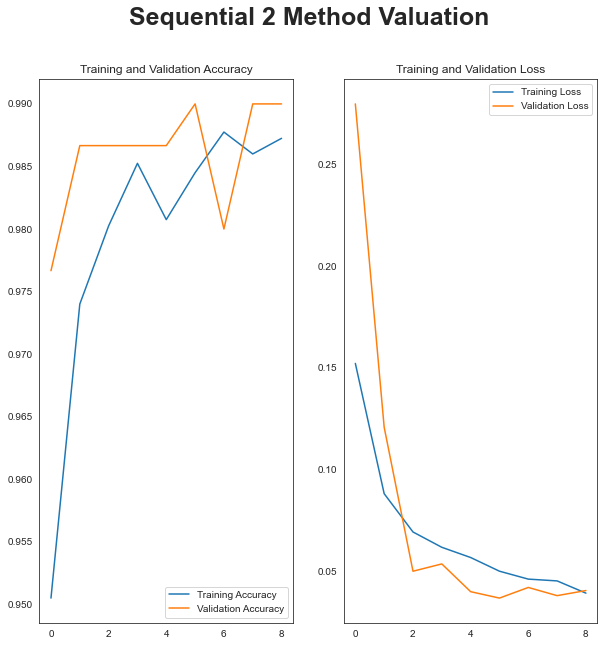

In [72]:
acc = history_improve.history['accuracy']
val_acc = history_improve.history['val_accuracy']

loss = history_improve.history['loss']
val_loss = history_improve.history['val_loss']

epochs_range = range(9)

plt.figure(figsize=(10, 10))
plt.suptitle( 'Sequential 2 Method Valuation', fontsize=25, weight='bold')
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

> Berdasarkan gambar grafik di atas diketahui bahwa semakin epochs bertambah mencapai 9, gradient semakin convergen di bagian loss dan accuracy. Meskipun pada gradient accuracy tidak bersingugungan saat epochs berhenti gradik ini tetap dinyatakan `Good Fit` karena jarak gradient tidak terlalu jauh. Sedangkan pada bagian loss menurut peneliti sangat smooth dan sangat dekat sehingga layak dinyatakan `Good Fit`

In [73]:
print("\nEvaluate on test data")
result = model_improve.evaluate(val_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
10/10 [==============================] - 33s 3s/step - loss: 0.0368 - accuracy: 0.9900
Test - Loss     :  0.03675588592886925
Test - Accuracy :  0.9900000095367432



Pada evaluasi di atas, saat model improvisasi melakukan proses pada dataset validation maka dihasilkan Skor Loss hanya sebesar 0.0367 dan hasi accuracy mencapai 0.99

In [41]:
print("\nEvaluate on test data")
result = model_improve.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
10/10 [==============================] - 15s 1s/step - loss: 0.0116 - accuracy: 0.9933
Test - Loss     :  0.011619657278060913
Test - Accuracy :  0.9933333396911621



Dengan menggunakan transfer learning ResNet50 maka dihasilkan accuracy mencapai 99% dan nilai loss yang sangat nyaris mendekati nilai 0. Dengan demikian hasil transfer learning dapat dinyatakan lebih baik dibanding dengan baseline model. karena menggunakan callback maka saat menginput maksimal epochs 50 sudah berhenti di epochs ke 9 karena di epochs 9 sudah menemukan hasil terbaiknya karena model sudah tidak bisa melakukan improvisasi lagi.

In [42]:
keras.backend.clear_session()

10/10 [==============================] - 2s 203ms/step


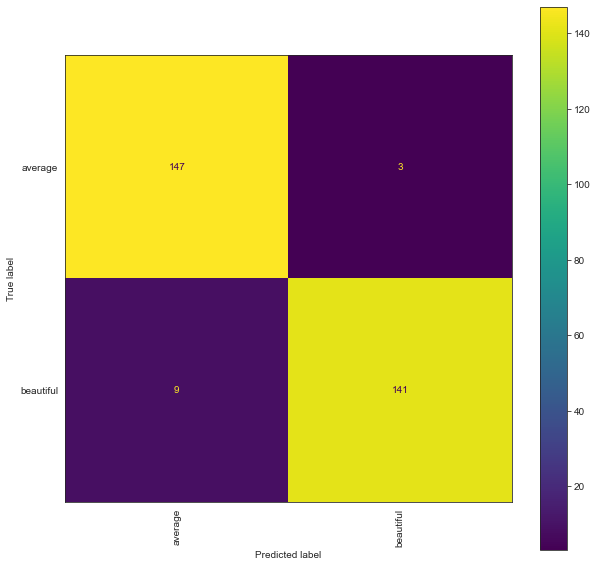

Classification Report
              precision    recall  f1-score   support

     average       0.94      0.98      0.96       150
   beautiful       0.98      0.94      0.96       150

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [44]:
pred = model_improve.predict(val_dataset)
pred = np.argmax(pred, axis=1)
true = tf.concat([y for x, y in val_dataset], axis = 0).numpy()
true = np.argmax(true,axis=1)
target_names = class_names
# confution Matrix
fig,ax = plt.subplots(figsize=[10,10])
ConfusionMatrixDisplay.from_predictions(true,pred, display_labels=class_names, xticks_rotation='vertical',ax=ax)
plt.show()
# classification report
print('Classification Report')
print(classification_report(true, pred, target_names=target_names))

Berdasarkan evaluasi dari pembuatan model improvement yang telah dilakukan, didapatkan :
- performa terhadap model memiliki val_loss 0.03 dan train loss 0.03 
- performa terhadap data pengklasifikasian pada validation set menghasilkan akurasi sebesar 0.96
- Model sangat baik dalam mengklasifikasikan beautiful dan average karena akurasi di atas 95%

## 9.Model Saving

In [45]:
model_improve.save('beauty_predict.h5')

Model Improvement dipilih sebagai model terbaik dibandingkan dengan model baseline berdasarkan perbandingan skor loss dan skor accuracy terbaik saat model melakukan testing pada test dataset. 
> Model Baseline terhadap test dataset :
- Skor Loss : 0.052
- Skor Accuracy :  0.98

> Model Improvement terhadap test dataset :
- Skor Loss : 0.03675588592886925
- Skor Accuracy :  0.990000

Dengan demikian Model Improvement dianggap lebih baik karena skor accuracy mencapai 0.99 dan hampir mencapai skor 1 dan loss hanya 0.036 dianggap sangat rencah karena skor tersebut mendekati skor 0 


## 10.Model Inference

In [46]:
# Load model
model = tf.keras.models.load_model('beauty_predict.h5')

10/10 [==============================] - 15s 1s/step


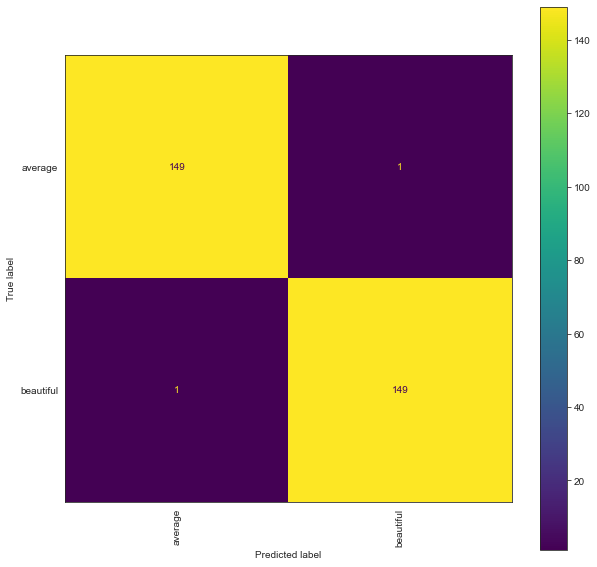

Classification Report
              precision    recall  f1-score   support

     average       0.99      0.99      0.99       150
   beautiful       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [47]:
pred = model.predict(test_dataset)
pred = np.argmax(pred, axis=1)
true = tf.concat([y for x, y in test_dataset], axis = 0).numpy()
true = np.argmax(true,axis=1)

# confusion Matrix
fig,ax = plt.subplots(figsize=[10,10])
ConfusionMatrixDisplay.from_predictions(true,pred, display_labels=class_names, xticks_rotation='vertical',ax=ax)
plt.show()
# classification report
print('Classification Report')
print(classification_report(true, pred, target_names=class_names))

> Berdasarkan Confussion Matrix :
- Dari 300 gambar pada test dataset, model ini mampu memprediksi dengan benar saat memprediksi kelas average dengan benar sebanyak 149 data dan hanya 1 kali mengalami kesalahan prediksi. Model mampu memprediksi dengan benar saat memprediksi kelas beautiful dengan benar sebanayk 149 data dan hanya 1 kali mengalami kesalahan prediksi

>Berdasarkan Classification Reppor :
Model ini dinyatakana sangat baik karena ditinjau dari segala sisi terutama accuracy memiliki skor mencapai 0.99. 


## 11.Model New Data

Pada tahap ini model akan diinput dengan gambar foto dari folder lokal atau new data.

In [58]:
test_img = r"D:\Milestone\Milestone 2 fase 2\images to predict\mama2.jpg"

img = keras.preprocessing.image.load_img(
    test_img, target_size=(200, 200))

In [59]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 250ms/step
This image most likely belongs to beautiful with a 73.00 percent confidence.


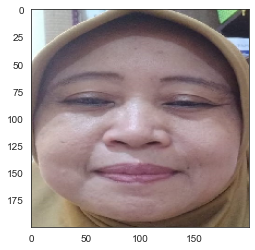

In [60]:
plt.imshow(img)
plt.show()

Hasil dari pengujian dengan new data menynjukan bahwa foto wajah tersebut masuk ke dalam kategori beautiful dengan persensate sebesar 73%

## 12.Conlussion

Pada penelitian ini kesimpulannya antara lain :
- Telah dilakukan pemodelan untuk mengklasifikasikan 2 kelas yaitu foto dengan kelas `beautiful` dan kelas `average`
- Proses data augmentasi terhadap data train dilakukan :
    1. Rescaling untuk mengubah nilai pada gambar dari 1-255 menjadi 0-1
    2. Random flip horizontal
    3. Random Rotation dengan rasio 0.3 

- Proses pembuat model menggunakan model baseline dan metode transfer learning dengan ResNet50. 
> Loss model baseline : 0.05
> accuracy model baseline : 0.98
> Loss mode improvement : 0.03
> accuracy model improvement : 0.99 
> model termasuk `Good Fit`

- Berdasarkan uji inferensi terhadap data test, accuracy yang didapatkan sebesar 0.99. Model sangat baik dalam membedakan kelas `beautiful` dan kelas `average`.

- Pada dunia nyata memang `beautiful` dan `average` merupakan penilaian berdasarkan suyektif namun model ini dapat cukup berguna untuk membantu peninjauan dalam morfologi wajah misalnya dalam dunia kecantikan dan tata rias, model dapat mengetahui kualitas foto wajah wanita jadi saat foto tersebut digunakan untuk sebagai KTP atau diupload di sosial media, pengguna model ini dapat mengetahui apakah foto tersebut sudah layak dishare atau belum. 
